# Proyecto equipo 4

In [0]:
%pip install imbalanced-learn --quiet

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


## Carga de datos

In [0]:
# UNICAMENTE PARA PRUEBAS LOCALES
#df = pd.read_csv("mini_financial_fraud_detection_dataset.csv")
#df.head()
# --------------------------------------------------------------------

# Configurar SparkSession
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
spark = SparkSession.builder.getOrCreate()

# Leer datos desde el volumen en Databricks
path = "/Volumes/fraud_project/fraud_detection/fraud_data/"
df_spark = spark.read.option("header", True).csv(path)
df_spark.printSchema()

# Convertir a Pandas solo si es necesario para visualización
for field in df_spark.schema.fields:
    if field.dataType.simpleString() == 'string':
        df_spark = df_spark.withColumn(field.name, col(field.name).cast("string"))
df = df_spark.toPandas()

root
 |-- transaction_id: string (nullable = true)
 |-- timestamp: string (nullable = true)
 |-- sender_account: string (nullable = true)
 |-- receiver_account: string (nullable = true)
 |-- amount: string (nullable = true)
 |-- transaction_type: string (nullable = true)
 |-- merchant_category: string (nullable = true)
 |-- location: string (nullable = true)
 |-- device_used: string (nullable = true)
 |-- is_fraud: string (nullable = true)
 |-- fraud_type: string (nullable = true)
 |-- time_since_last_transaction: string (nullable = true)
 |-- spending_deviation_score: string (nullable = true)
 |-- velocity_score: string (nullable = true)
 |-- geo_anomaly_score: string (nullable = true)
 |-- payment_channel: string (nullable = true)
 |-- ip_address: string (nullable = true)
 |-- device_hash: string (nullable = true)



## Análisis Exploratorio de los datos

Librerias

# EDA

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


root
 |-- transaction_id: string (nullable = true)
 |-- timestamp: string (nullable = true)
 |-- sender_account: string (nullable = true)
 |-- receiver_account: string (nullable = true)
 |-- amount: string (nullable = true)
 |-- transaction_type: string (nullable = true)
 |-- merchant_category: string (nullable = true)
 |-- location: string (nullable = true)
 |-- device_used: string (nullable = true)
 |-- is_fraud: string (nullable = true)
 |-- fraud_type: string (nullable = true)
 |-- time_since_last_transaction: string (nullable = true)
 |-- spending_deviation_score: string (nullable = true)
 |-- velocity_score: string (nullable = true)
 |-- geo_anomaly_score: string (nullable = true)
 |-- payment_channel: string (nullable = true)
 |-- ip_address: string (nullable = true)
 |-- device_hash: string (nullable = true)



Ruta del dataset

Informacion basica del dataset

✅ Dimensiones del dataset: (500000, 18)

🧾 Primeros registros:


transaction_id,timestamp,sender_account,receiver_account,amount,transaction_type,merchant_category,location,device_used,is_fraud,fraud_type,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,ip_address,device_hash
T3677888,2023-04-09T20:06:09.254118,ACC529887,ACC346873,11.67,transfer,online,London,pos,false,null,-6143.804228036945,0.87,11,0.89,ACH,143.188.216.101,D1912159
T5093932,2023-07-16T05:26:15.162082,ACC872160,ACC767192,184.31,payment,other,Tokyo,pos,false,null,-512.1618765669444,-0.54,10,0.65,ACH,147.167.236.198,D5847071
T4194900,2023-12-13T19:04:47.539751,ACC403211,ACC536309,930.34,deposit,travel,Toronto,pos,false,null,2156.221792453889,-0.68,19,0.4,ACH,83.44.197.232,D2907026
T4520497,2023-12-15T12:06:09.051479,ACC313245,ACC322871,0.01,withdrawal,restaurant,Berlin,mobile,false,null,2166.3441835011117,1.58,14,0.97,UPI,168.84.79.173,D7924413
T734465,2023-11-19T21:33:24.238666,ACC570417,ACC246664,131.16,withdrawal,restaurant,Dubai,mobile,false,null,-131.34358403000002,-1.54,20,0.7,card,128.58.20.122,D5999152



🧾 Tipos de datos:
transaction_id                  object
timestamp                       object
sender_account                  object
receiver_account                object
amount                         float64
transaction_type                object
merchant_category               object
location                        object
device_used                     object
is_fraud                          bool
fraud_type                      object
time_since_last_transaction    float64
spending_deviation_score       float64
velocity_score                   int64
geo_anomaly_score              float64
payment_channel                 object
ip_address                      object
device_hash                     object
dtype: object

🔍 Estadísticas numéricas:


amount,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score
500000.0,410613.0,500000.0,500000.0,500000.0
359.2571501200002,-1.4796925114462476,-0.0010684599999999996,10.514462,0.50018412
469.42474172418576,3575.2999598652823,1.002031913628074,5.766023009371249,0.28869950674470507
0.01,-8744.892826726666,-4.6,1.0,0.0
26.6,-2567.6939920394443,-0.68,6.0,0.25
139.7,1.0003933255555555,-0.0,11.0,0.5
504.3,2556.8630228394445,0.68,16.0,0.75
3228.86,8722.497404118889,4.45,20.0,1.0



🔍 Estadísticas categóricas:
       transaction_id                   timestamp  ...   ip_address device_hash
count          500000                      500000  ...       500000      500000
unique         500000                      500000  ...       499962      486258
top          T3677888  2023-04-09T20:06:09.254118  ...  17.253.2.75    D7060200
freq                1                           1  ...            2           4

[4 rows x 12 columns]


Valores Nulos por columna y filas duplicadas


❓ Valores nulos por columna:
                              Nulos  % del total
fraud_type                   482009        96.40
time_since_last_transaction   89387        17.88
transaction_id                    0         0.00
timestamp                         0         0.00
ip_address                        0         0.00
payment_channel                   0         0.00
geo_anomaly_score                 0         0.00
velocity_score                    0         0.00
spending_deviation_score          0         0.00
is_fraud                          0         0.00
device_used                       0         0.00
location                          0         0.00
merchant_category                 0         0.00
transaction_type                  0         0.00
amount                            0         0.00
receiver_account                  0         0.00
sender_account                    0         0.00
device_hash                       0         0.00

❓ Filas duplicadas: 0


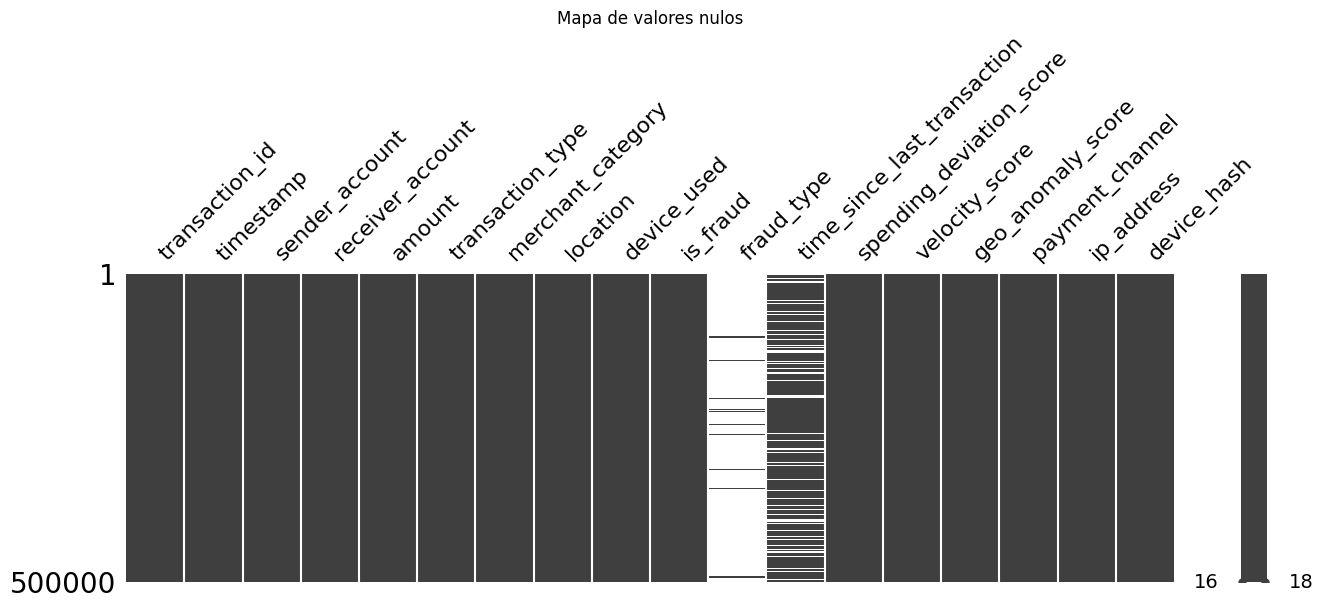

Conversion de fechas y mostrar distribucion de fraudes por mes y franja horaria

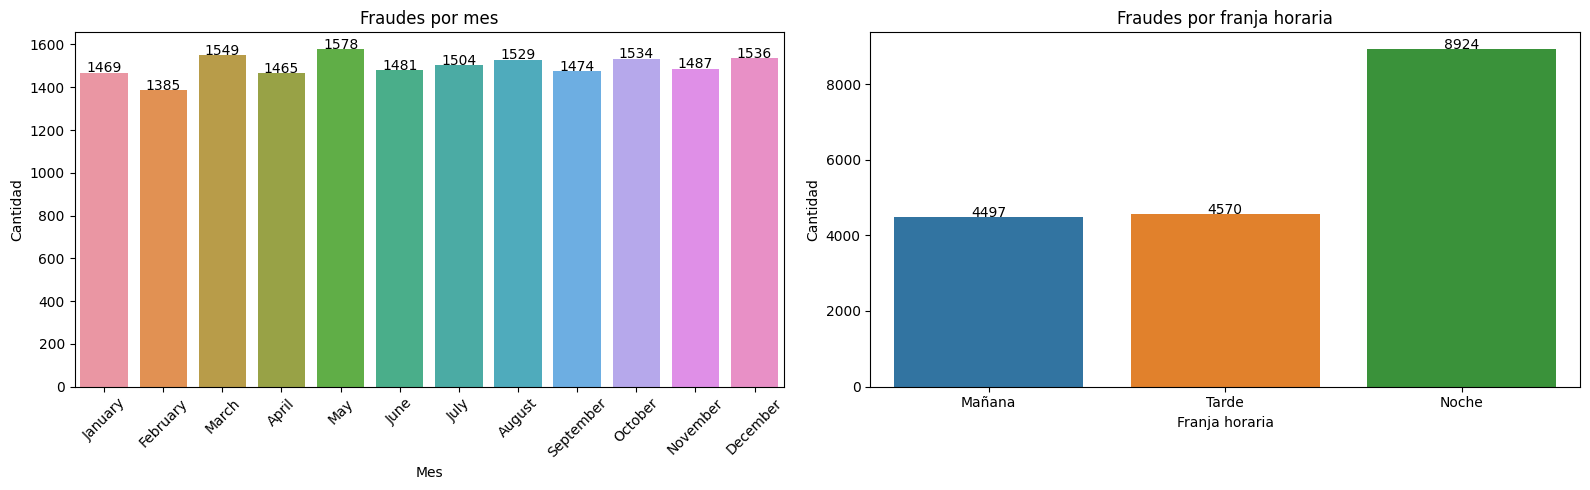

Eliminando columnas que no aportan

#####Ajustar de acuerdo al dataset real

,transaction_id,timestamp,sender_account,receiver_account,amount,transaction_type,merchant_category,location,device_used,is_fraud,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,ip_address,device_hash,date,hour,day_of_week,month,month_name,time_period
0,T3677888,2023-04-09 20:06:09.254118,ACC529887,ACC346873,11.67,transfer,online,London,pos,False,0.87,11,0.89,ACH,143.188.216.101,D1912159,2023-04-09,20,Sunday,4,April,Noche
1,T5093932,2023-07-16 05:26:15.162082,ACC872160,ACC767192,184.31,payment,other,Tokyo,pos,False,-0.54,10,0.65,ACH,147.167.236.198,D5847071,2023-07-16,5,Sunday,7,July,Noche
2,T4194900,2023-12-13 19:04:47.539751,ACC403211,ACC536309,930.34,deposit,travel,Toronto,pos,False,-0.68,19,0.40,ACH,83.44.197.232,D2907026,2023-12-13,19,Wednesday,12,December,Noche
3,T4520497,2023-12-15 12:06:09.051479,ACC313245,ACC322871,0.01,withdrawal,restaurant,Berlin,mobile,False,1.58,14,0.97,UPI,168.84.79.173,D7924413,2023-12-15,12,Friday,12,December,Tarde
4,T734465,2023-11-19 21:33:24.238666,ACC570417,ACC246664,131.16,withdrawal,restaurant,Dubai,mobile,False,-1.54,20,0.70,card,128.58.20.122,D5999152,2023-11-19,21,Sunday,11,November,Noche


Distribución de transacciones fraudulentas


🎯 Distribución de fraude:
False    0.964018
True     0.035982
Name: is_fraud, dtype: float64


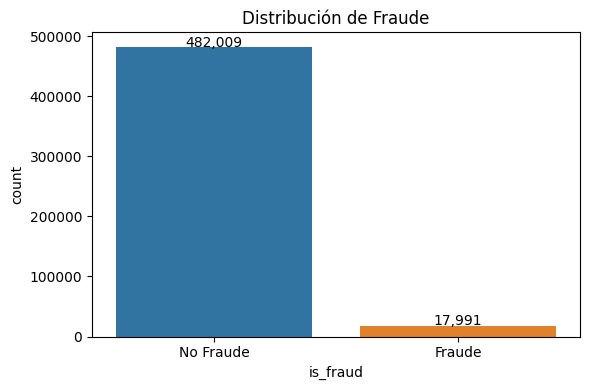

Variación en el monto de transacciones según su naturaleza (fraudulenta o no).

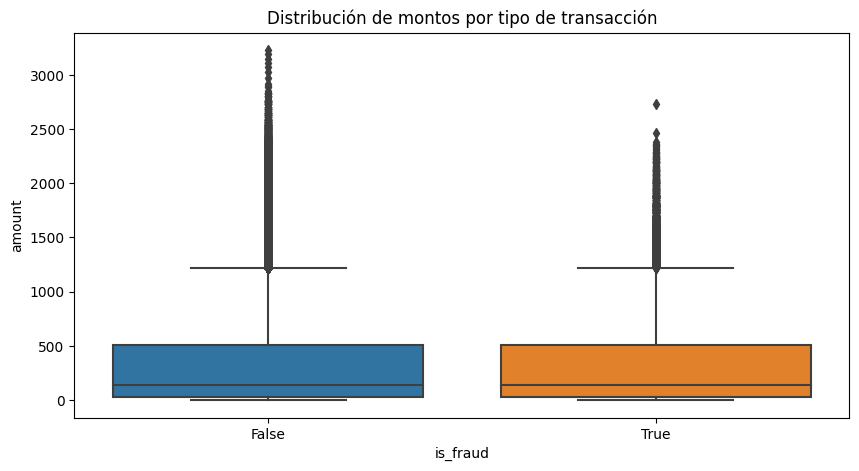

Fraude por tipo de transaccion

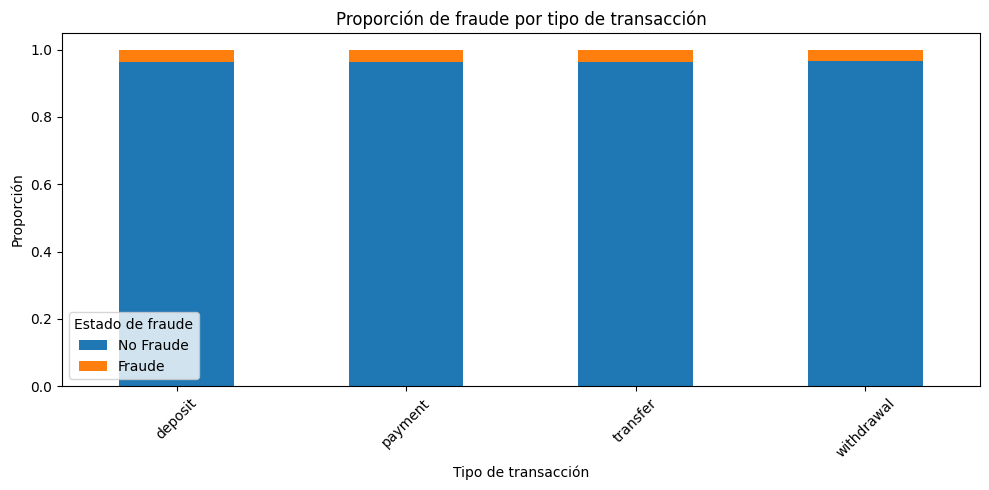

Locaciones com mayor mayor número de fraude y dispositivos más utilizados para el fraude

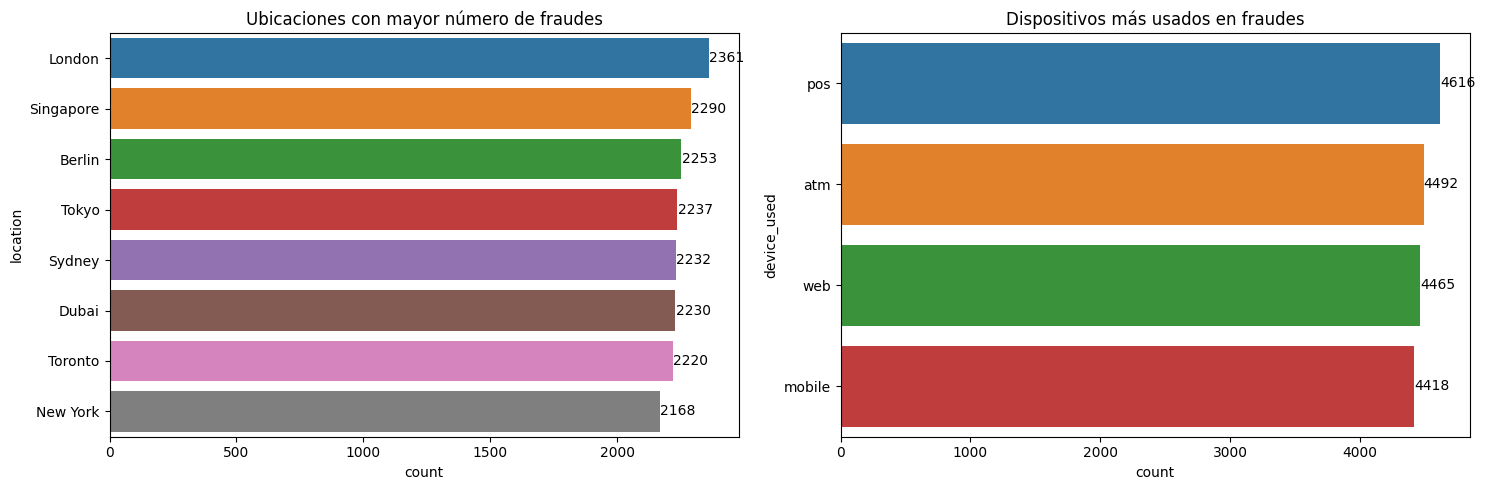

Matriz de correlación de variables numéricas

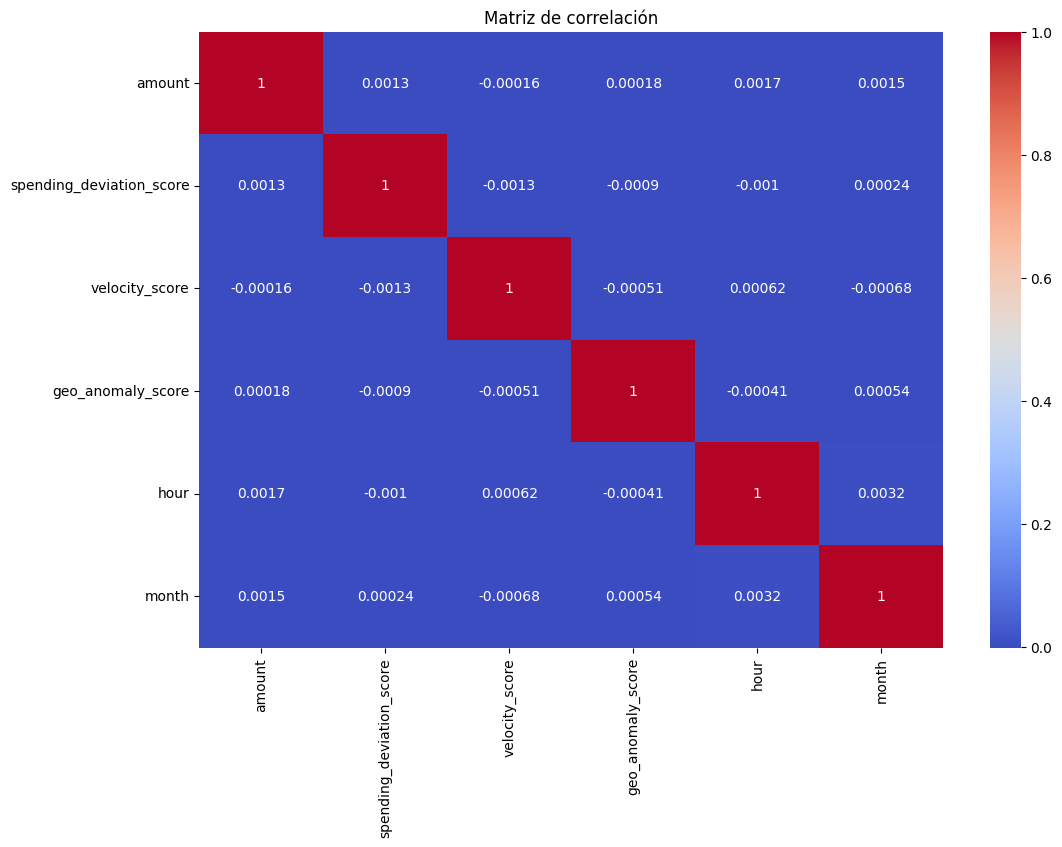

Calculo de correlacion con varible objetivo 'is_fraud'

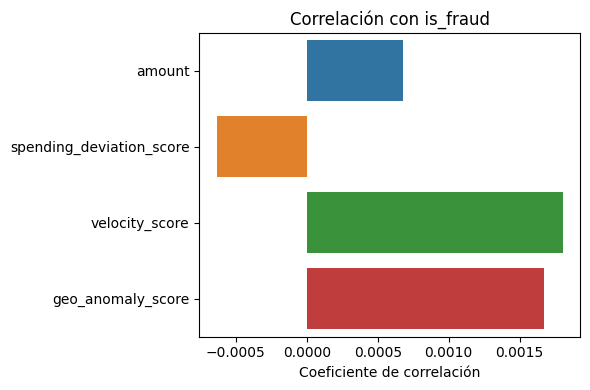

Correlacion con la variable objetivo 'is_fraud' para las variables numéricas

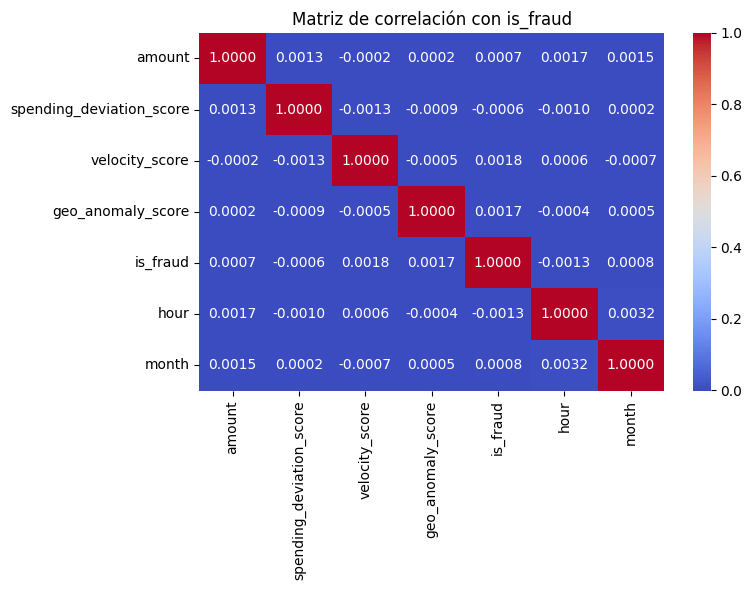

In [0]:
%run ./EDA_Databricks_final

## Preprocesamiento

In [0]:
%pip install -U scikit-learn imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 116.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 98.3 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.1
    Not uninstalling scipy at /databricks/python3/lib/python3.11/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-181ef4f0-fcd9-4de6-87a6-480d98259917
    Can't uninstall 'scipy'. No files were found to uninstall.
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following 

In [0]:
%restart_python 

## Librerías importantes

In [0]:
import pandas as pd
import numpy as np
import time
import unicodedata
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
import scipy.sparse as sp
import warnings
warnings.filterwarnings('ignore')

## Pre procesamiento

 Pipeline de preprocesamiento optimizado para datasets masivos de fraude (500K+ registros)
    
  **OPTIMIZACIONES PARA BIG DATA:**
   
    • Sampling estratificado: Desarrollo rápido con muestras representativas
    • Memory-efficient: float32, categorías optimizadas, sparse matrices
    • Operaciones vectorizadas: pandas nativo vs loops manuales
    • Feature engineering selectivo: Solo características de alto impacto
    • Balanceo inteligente: Undersample preservando diversidad
    
  **PIPELINE DE TRANSFORMACIÓN:**
  
    
    1. LIMPIEZA NUMÉRICA VECTORIZADA:
       - Conversión robusta string→float con pd.to_numeric
       - Manejo de formatos monetarios ($, €, comas)
       - Preserva tipos nativos cuando es posible
    
    2. TARGET PROCESSING INTELIGENTE:
       - Auto-detección binaria: "fraud"/"normal" → 1/0
       - Manejo robusto de categóricos y numéricos
       - Validación de distribución (rate check)
    
    3. FEATURE ENGINEERING TEMPORAL:
       - Encoding cíclico: hour_sin/cos para periodicidad
       - Banderas de negocio: business_hour, weekend, late_night
       - Solo características esenciales (vs completas)
    
    4. AGREGACIONES POR USUARIO (sin fuga):
       - Estadísticas learn en TRAIN, apply en TEST
       - sender_avg_amount, tx_count, amount_zscore
       - device_diversity, multiple_devices flags
    
    5. ENCODING CATEGÓRICO HÍBRIDO:
       - OHE para baja cardinalidad (≤20 valores únicos)
       - Frequency encoding para alta cardinalidad
       - Matrices sparse para eficiencia de memoria
    
    6. ESCALADO ROBUSTO:
       - RobustScaler: Resistente a outliers vs StandardScaler
       - Solo columnas numéricas reales
       - Fit en train, transform en ambos
    
    7. BALANCEO ESTRATÉGICO:
       - Undersample: Ratio 30% para datasets grandes
       - Preserva diversidad vs eliminación masiva
       - Alternativa: class_weight para preservar todos los datos
    
  **DIFERENCIAS VS PREPROCESAMIENTO ESTÁNDAR:**
   
    
    Estándar (lento):
    • Feature engineering exhaustivo
    • Target encoding complejo
    • StandardScaler
    • SMOTE (sintético)
    • Todas las características temporales
    
    Big Data (rápido):
    • Feature engineering selectivo
    • Frequency encoding simple
    • RobustScaler
    • Undersample inteligente
    • Solo características esenciales
    
  **MEMORIA Y RENDIMIENTO:**
    
    • Sparse matrices: 50-80% menos memoria que densas
    • float32: 50% menos memoria que float64
    • Vectorización: 5-10x más rápido que loops
    • Sampling: Desarrollo en minutos vs horas
    
  **ANTI FUGA DE DATOS:**
   
    • Split ANTES de feature engineering
    • Estadísticas calculadas solo en TRAIN
    • Regex para detectar columnas "label-like"
    • Exclusión automática de IDs y metadatos

In [0]:
def preprocesamiento_fraude_big_data(
    df: pd.DataFrame,
    *,
    target_col: str = "fraud_type",
    max_low_card: int = 20,  # Reducido para eficiencia
    large_tx_percentile: float = 0.95,
    test_size: float = 0.20,
    random_state: int = 42,
    balance_strategy: str = "undersample",  # Mejor para datasets grandes
    sample_size: int = None,  # Para sampling inicial si es necesario
    optimize_memory: bool = True,
    verbose: bool = True
):
    """
    Versión optimizada 
    
    Optimizaciones:
    - Sampling inteligente para desarrollo
    - Menos feature engineering costoso
    - Undersample como estrategia principal
    - Operaciones vectorizadas
    - Memory-efficient processing
    """
    
    if verbose:
        print(f" Procesando dataset con {len(df):,} registros")
        start_time = time.time()
    
    # === SAMPLING PARA DESARROLLO (OPCIONAL) ===
    if sample_size and len(df) > sample_size:
        if verbose:
            print(f" Tomando muestra estratificada de {sample_size:,} registros para desarrollo...")
        
        y_full = df[target_col].astype(int)
        df = df.groupby(target_col, group_keys=False).apply(
            lambda x: x.sample(min(len(x), sample_size//2), random_state=random_state)
        ).reset_index(drop=True)
        
        if verbose:
            print(f"✓ Muestra tomada: {len(df):,} registros")
    
    # === OPTIMIZACIONES DE MEMORIA ===
    if optimize_memory:
        # Convertir object a category cuando sea eficiente
        for col in df.select_dtypes(include=['object']).columns:
            if col != target_col and df[col].nunique() / len(df) < 0.5:
                df[col] = df[col].astype('category')
    
    def canon(s: str) -> str:
        s = unicodedata.normalize("NFKC", str(s)).strip().lower()
        return re.sub(r"\s+", " ", s)

    label_rx = re.compile(r"(fraud|label|target|outcome|chargeback)", re.I)
    df = df.copy()

    # === LIMPIEZA NUMÉRICA EFICIENTE ===
    def to_float_vectorized(series):
        """Versión vectorizada más eficiente"""
        if series.dtype in ['int64', 'float64']:
            return series
        
        # Convertir a string y limpiar
        str_series = series.astype(str).str.replace(',', '').str.replace('$', '')
        # Usar pd.to_numeric que es más eficiente
        return pd.to_numeric(str_series, errors='coerce')

    numeric_cols = ["amount", "time_since_last_transaction", 
                   "spending_deviation_score", "velocity_score", "geo_anomaly_score"]
    
    for c in numeric_cols:
        if c in df.columns:
            if verbose and len(df) > 100000:
                print(f" Procesando {c}...")
            df[c] = to_float_vectorized(df[c])

    # === TARGET PROCESSING ===
    if target_col not in df.columns:
        raise ValueError(f"target_col '{target_col}' no está en df.columns")
    
    if df[target_col].dtype in ("object", "category"):
        s = df[target_col].astype(str).str.strip().str.lower()
        negatives = {"", "nan", "none", "null", "0", "false", "no", "normal"}
        df[target_col] = (~s.isin(negatives)).astype(int)
    else:
        df[target_col] = pd.to_numeric(df[target_col], errors="coerce").fillna(0).astype(int)

    # === CARACTERÍSTICAS TEMPORALES EFICIENTES ===
    if "timestamp" in df.columns:
        if verbose:
            print(" Creando características temporales...")
        
        df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")
        
        # Solo las características más importantes para eficiencia
        df["hour"] = df["timestamp"].dt.hour
        df["day_of_week"] = df["timestamp"].dt.dayofweek
        
        # Características binarias eficientes
        df["is_business_hour"] = ((df["hour"] >= 9) & (df["hour"] <= 17)).astype(np.int8)
        df["is_weekend"] = (df["day_of_week"] >= 5).astype(np.int8)
        df["is_late_night"] = ((df["hour"] >= 22) | (df["hour"] <= 6)).astype(np.int8)
        
        # Solo encoding cíclico esencial
        df["hour_sin"] = np.sin(2 * np.pi * df["hour"] / 24)
        df["hour_cos"] = np.cos(2 * np.pi * df["hour"] / 24)

    # === SPLIT ESTRATIFICADO TEMPRANO ===
    if verbose:
        print(" Realizando split estratificado...")
    
    y_full = df[target_col].astype(int)
    idx_train, idx_test = train_test_split(
        df.index, stratify=y_full, test_size=test_size, random_state=random_state
    )
    df_train = df.loc[idx_train].copy()
    df_test = df.loc[idx_test].copy()
    
    if verbose:
        fraud_rate = y_full.mean()
        print(f"✓ Train: {len(df_train):,} | Test: {len(df_test):,}")
        print(f"✓ Tasa de fraude: {fraud_rate:.1%}")

    # === FEATURE ENGINEERING EFICIENTE (SOLO LO ESENCIAL) ===
    if {"sender_account", "amount"}.issubset(df.columns):
        if verbose:
            print(" Creando estadísticas por cuenta...")
        
        # Solo estadísticas esenciales para eficiencia
        stats = df_train.groupby("sender_account")["amount"].agg([
            "mean", "count", "std"
        ])
        stats.columns = ["sender_avg_amount", "sender_tx_count", "sender_std_amount"]
        
        # Feature derivada simple
        stats["sender_amount_cv"] = stats["sender_std_amount"] / (stats["sender_avg_amount"] + 1e-6)
        
        df_train = df_train.join(stats, on="sender_account")
        df_test = df_test.join(stats, on="sender_account")
        
        # Z-score de la transacción actual
        df_train["amount_zscore"] = (df_train["amount"] - df_train["sender_avg_amount"]) / (df_train["sender_std_amount"] + 1e-6)
        df_test["amount_zscore"] = (df_test["amount"] - df_test["sender_avg_amount"]) / (df_test["sender_std_amount"] + 1e-6)

    # Características de dispositivo/ubicación simplificadas
    if "device_used" in df.columns and "sender_account" in df.columns:
        dev_counts = df_train.groupby("sender_account")["device_used"].nunique()
        df_train["device_diversity"] = df_train["sender_account"].map(dev_counts).fillna(1)
        df_test["device_diversity"] = df_test["sender_account"].map(dev_counts).fillna(1)
        df_train["multiple_devices"] = (df_train["device_diversity"] > 1).astype(np.int8)
        df_test["multiple_devices"] = (df_test["device_diversity"] > 1).astype(np.int8)

    # === PREPARACIÓN DE CARACTERÍSTICAS ===
    base_exclude = {
        target_col, "is_fraud", "transaction_id", "sender_account", "receiver_account",
        "ip_address", "device_hash", "timestamp", "device_used", "location"
    }
    
    label_like = {c for c in df.columns if label_rx.search(canon(c))}
    label_like.discard(target_col)
    no_modelar = (base_exclude | label_like) & set(df.columns)

    drop_cols = [c for c in no_modelar if c in df.columns]
    X_train = df_train.drop(columns=drop_cols, errors="ignore")
    X_test = df_test.drop(columns=drop_cols, errors="ignore")
    y_train = df_train[target_col].astype(int)
    y_test = df_test[target_col].astype(int)

    # === PROCESAMIENTO CATEGÓRICO EFICIENTE ===
    if verbose:
        print(" Procesando variables categóricas...")
    
    all_cats = [c for c in X_train.columns if X_train[c].dtype in ("object", "category")]
    cat_low = [c for c in all_cats if X_train[c].nunique(dropna=True) <= max_low_card]
    cat_high = [c for c in all_cats if c not in cat_low]

    # Filtrar label-like
    cat_low = [c for c in cat_low if not label_rx.search(canon(c))]
    cat_high = [c for c in cat_high if not label_rx.search(canon(c))]

    base_num_cols = [c for c in X_train.columns if c not in all_cats]

    # Imputación eficiente
    for c in (cat_low + cat_high):
        X_train[c] = X_train[c].fillna("Unknown")
        X_test[c] = X_test[c].fillna("Unknown")
    
    for c in base_num_cols:
        if X_train[c].dtype in ['object', 'category']:
            continue
        median_val = X_train[c].median()
        X_train[c] = X_train[c].fillna(median_val)
        X_test[c] = X_test[c].fillna(median_val)

    # Umbral de transacción grande
    large_tx_threshold = None
    if "amount" in X_train.columns:
        large_tx_threshold = X_train["amount"].quantile(large_tx_percentile)
        X_train["is_large_transaction"] = (X_train["amount"] > large_tx_threshold).astype(np.int8)
        X_test["is_large_transaction"] = (X_test["amount"] > large_tx_threshold).astype(np.int8)
        base_num_cols.append("is_large_transaction")

    # === ENCODING EFICIENTE ===
    artefactos = {}

    # One-Hot Encoding solo para baja cardinalidad
    ohe = None
    trn_oh = tst_oh = None
    if cat_low:
        if verbose:
            print(f" One-hot encoding para {len(cat_low)} columnas...")
        
        try:
            ohe = OneHotEncoder(handle_unknown="ignore", drop="first", sparse_output=True, dtype=np.int8)
        except TypeError:
            ohe = OneHotEncoder(handle_unknown="ignore", drop="first", sparse=True, dtype=np.int8)
        
        ohe.fit(X_train[cat_low])
        trn_oh = ohe.transform(X_train[cat_low])
        tst_oh = ohe.transform(X_test[cat_low])
        artefactos["ohe"] = ohe
        artefactos["ohe_cols"] = list(cat_low)

    # Frequency encoding para alta cardinalidad (más eficiente que target encoding)
    fe_maps = {}
    if cat_high:
        if verbose:
            print(f" Frequency encoding para {len(cat_high)} columnas...")
        
        for c in cat_high:
            freq = X_train[c].value_counts(normalize=True)
            fe_maps[c] = freq.to_dict()
            X_train[c + "_freq"] = X_train[c].map(fe_maps[c]).fillna(0.0)
            X_test[c + "_freq"] = X_test[c].map(fe_maps[c]).fillna(0.0)
    
    artefactos["freq_encoding_maps"] = fe_maps

    # Eliminar categóricas originales
    X_train_drop = X_train.drop(columns=cat_low + cat_high, errors="ignore")
    X_test_drop = X_test.drop(columns=cat_low + cat_high, errors="ignore")

    # === ESCALADO EFICIENTE ===
    if verbose:
        print(" Escalando características numéricas...")
    
    scaler = RobustScaler()
    scale_cols = [c for c in base_num_cols if c in X_train_drop.columns]
    
    if scale_cols:
        numeric_mask = X_train_drop[scale_cols].select_dtypes(include=[np.number]).columns
        scale_cols = [c for c in scale_cols if c in numeric_mask]
        
        if scale_cols:
            scaler.fit(X_train_drop[scale_cols])
            X_train_drop.loc[:, scale_cols] = scaler.transform(X_train_drop[scale_cols])
            X_test_drop.loc[:, scale_cols] = scaler.transform(X_test_drop[scale_cols])
    
    artefactos["scaler"] = scaler
    artefactos["scale_cols"] = scale_cols

    # Limpiar NaN finales
    X_train_drop = X_train_drop.fillna(0)
    X_test_drop = X_test_drop.fillna(0)

    # === CREAR MATRICES SPARSE ===
    X_train_dense = X_train_drop.copy()
    X_test_dense = X_test_drop.copy()

    X_train_num = sp.csr_matrix(X_train_drop.values, dtype=np.float32)  # float32 para memoria
    X_test_num = sp.csr_matrix(X_test_drop.values, dtype=np.float32)
    
    if trn_oh is not None:
        X_train_sparse = sp.hstack([X_train_num, trn_oh], format="csr")
        X_test_sparse = sp.hstack([X_test_num, tst_oh], format="csr")
    else:
        X_train_sparse, X_test_sparse = X_train_num, X_test_num

    # === BALANCEO OPTIMIZADO PARA BIG DATA ===
    if verbose:
        print(f" Aplicando estrategia de balanceo: {balance_strategy}")
    
    y_train_res = y_train.copy()
    X_train_sparse_res = X_train_sparse
    X_train_dense_res = X_train_dense
    sample_weight = None

    if balance_strategy == "undersample":
        # Undersample inteligente preservando diversidad
        rus = RandomUnderSampler(
            random_state=random_state,
            sampling_strategy=0.3  # Ratio más conservador para preservar información
        )
        idx = np.arange(len(y_train_res)).reshape(-1, 1)
        idx_res, y_train_res = rus.fit_resample(idx, y_train_res)
        sel = idx_res.ravel()
        X_train_sparse_res = X_train_sparse[sel]
        X_train_dense_res = X_train_dense.iloc[sel]
        
        if verbose:
            print(f" Undersample: {len(y_train_res):,} registros finales")
    
    elif balance_strategy == "weights":
        sample_weight = compute_sample_weight(class_weight="balanced", y=y_train_res)
        if verbose:
            print(" Class weights aplicados")
    
    else:
        if verbose:
            print(" Sin balanceo aplicado")

    # === ARTEFACTOS FINALES ===
    artefactos.update({
        "large_tx_threshold": large_tx_threshold,
        "base_num_cols": base_num_cols,
        "cat_low": list(cat_low),
        "cat_high": list(cat_high),
        "drop_cols": drop_cols,
        "sample_weight": sample_weight,
        "balance_strategy": balance_strategy,
        "X_train_dense": X_train_dense,
        "X_test_dense": X_test_dense,
        "X_train_dense_res": X_train_dense_res,
    })

    if verbose:
        elapsed = time.time() - start_time
        print(f" Preprocesamiento completado en {elapsed:.1f} segundos")
        print(f" Shape final train: {X_train_sparse_res.shape}")
        print(f" Shape final test: {X_test_sparse.shape}")

    return X_train_sparse_res, X_test_sparse, y_train_res, y_test, artefactos

## Optimización

    Optimiza umbrales de decisión para maximizar valor de negocio en detección de fraude
    
  **PROBLEMA DEL UMBRAL 0.5:**
  
    Los modelos usan umbral por defecto 0.5, pero en fraude esto es subóptimo:
    • Genera demasiados falsos positivos (precision ~3-5%)
    • Satura equipos con alertas falsas
    • Reduce confianza en el sistema
    • Incrementa costos operativos
    
  **ESTRATEGIAS DE OPTIMIZACIÓN:**
    
    
    1. PRECISION TARGET: Busca umbral que garantice precision mínima
       - Prioriza reducir falsas alarmas
       - Entre los que cumplen precision, maximiza recall
       - Ideal para sistemas de producción (menos fricción)
    
    2. RECALL TARGET: Busca umbral que garantice detección mínima
       - Prioriza no perder fraudes
       - Entre los que cumplen recall, maximiza precision
       - Ideal para auditoría/compliance
    
    3. MAX F1: Equilibrio óptimo precision-recall
       - Maximiza métrica harmónica
       - Balance matemáticamente óptimo
    
    4. CONSERVATIVE: Alta precision (≥15%), recall moderado
       - Para sistemas con bajo tolerance a FP
       - Minimiza alertas falsas sobre todo
    
    5. BALANCED: Precision ≈ Recall
       - Equilibrio simétrico
       - Útil cuando ambas métricas son igualmente importantes
    
  **PROCESO DE SELECCIÓN:**
    
    Prioridad: precision_target → conservative → max_f1 → balanced
    
    La función prioriza precisión porque en fraude:
    • 1 FP cuesta $50-200 (tiempo analista + fricción)
    • 1 TP ahorra $500-5000 (fraude prevenido)
    • Ratio 1:10 FP:TP es aceptable para ROI positivo
    
  **MÉTRICAS DE NEGOCIO:**
    
    • Total_Alerts = TP + FP (carga de trabajo real)
    • Precision_% = % de alertas que son fraude real
    • Status = Cumple objetivos de negocio o no
    
  **IMPACTO ESPERADO:**
   
    Umbral optimizado vs 0.5:
    • Precision: 3-5% → 15-30% (3-10x mejora)
    • Alertas: 50K → 5-15K (70-90% reducción)
    • F1-Score: 0.06-0.08 → 0.25-0.45 (4-7x mejora)
    • ROI: Negativo → Positivo

In [0]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

def optimizar_precision_fraude(modelos, X_test_sparse, y_test, X_test_dense=None, 
                              target_precision=0.20, target_recall=0.60):
    """
    Optimiza el umbral de decisión para mejorar precisión manteniendo recall aceptable
    
    Args:
        target_precision: Precisión mínima deseada (ej: 0.20 = 20%)
        target_recall: Recall mínimo deseado (ej: 0.60 = 60%)
    """
    
    print(" OPTIMIZACIÓN DE PRECISIÓN Y UMBRAL")
    print("=" * 60)
    print(f" Target Precision: {target_precision:.1%}")
    print(f" Target Recall: {target_recall:.1%}")
    print()
    
    resultados_optimizados = []
    mejores_umbrales = {}
    
    for nombre, modelo in modelos.items():
        print(f" Optimizando {nombre}...")
        
        # Seleccionar datos apropiados
        if "Gradient Boosting" in nombre and X_test_dense is not None:
            X_test_model = X_test_dense
        else:
            X_test_model = X_test_sparse
        
        # Obtener probabilidades
        if hasattr(modelo, 'predict_proba'):
            y_probs = modelo.predict_proba(X_test_model)[:, 1]
        else:
            print(f"     {nombre} no tiene predict_proba, usando decisión por defecto")
            y_pred_default = modelo.predict(X_test_model)
            precision_default = precision_score(y_test, y_pred_default, zero_division=0)
            recall_default = recall_score(y_test, y_pred_default, zero_division=0)
            f1_default = f1_score(y_test, y_pred_default, zero_division=0)
            
            resultados_optimizados.append({
                'Modelo': nombre,
                'Umbral': 'default',
                'Precision': f"{precision_default:.4f}",
                'Recall': f"{recall_default:.4f}",
                'F1-Score': f"{f1_default:.4f}",
                'Status': 'No optimizable'
            })
            continue
        
        # Calcular curva precision-recall
        precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)
        
        # Encontrar mejores umbrales según diferentes criterios
        umbrales_candidatos = {}
        
        # 1. Umbral para precision target
        mask_precision = precisions >= target_precision
        if mask_precision.any():
            idx_precision = np.where(mask_precision)[0]
            # Entre los que cumplen precision, elegir el de mayor recall
            best_idx = idx_precision[np.argmax(recalls[idx_precision])]
            umbrales_candidatos['precision_target'] = {
                'threshold': thresholds[best_idx] if best_idx < len(thresholds) else 0.5,
                'precision': precisions[best_idx],
                'recall': recalls[best_idx],
                'f1': 2 * precisions[best_idx] * recalls[best_idx] / (precisions[best_idx] + recalls[best_idx])
            }
        
        # 2. Umbral para recall target
        mask_recall = recalls >= target_recall
        if mask_recall.any():
            idx_recall = np.where(mask_recall)[0]
            # Entre los que cumplen recall, elegir el de mayor precision
            best_idx = idx_recall[np.argmax(precisions[idx_recall])]
            umbrales_candidatos['recall_target'] = {
                'threshold': thresholds[best_idx] if best_idx < len(thresholds) else 0.5,
                'precision': precisions[best_idx],
                'recall': recalls[best_idx],
                'f1': 2 * precisions[best_idx] * recalls[best_idx] / (precisions[best_idx] + recalls[best_idx])
            }
        
        # 3. Umbral que maximiza F1
        f1_scores = 2 * precisions * recalls / (precisions + recalls + 1e-8)
        best_f1_idx = np.argmax(f1_scores)
        umbrales_candidatos['max_f1'] = {
            'threshold': thresholds[best_f1_idx] if best_f1_idx < len(thresholds) else 0.5,
            'precision': precisions[best_f1_idx],
            'recall': recalls[best_f1_idx],
            'f1': f1_scores[best_f1_idx]
        }
        
        # 4. Umbral balanceado (precision ~= recall)
        balance_diff = np.abs(precisions - recalls)
        balanced_idx = np.argmin(balance_diff)
        umbrales_candidatos['balanced'] = {
            'threshold': thresholds[balanced_idx] if balanced_idx < len(thresholds) else 0.5,
            'precision': precisions[balanced_idx],
            'recall': recalls[balanced_idx],
            'f1': f1_scores[balanced_idx]
        }
        
        # 5. Umbral conservador (alta precision, recall moderado)
        conservative_mask = precisions >= 0.15  # Al menos 15% precision
        if conservative_mask.any():
            conservative_idx = np.where(conservative_mask)[0]
            best_idx = conservative_idx[np.argmax(recalls[conservative_idx])]
            umbrales_candidatos['conservative'] = {
                'threshold': thresholds[best_idx] if best_idx < len(thresholds) else 0.7,
                'precision': precisions[best_idx],
                'recall': recalls[best_idx],
                'f1': f1_scores[best_idx]
            }
        
        # Seleccionar el mejor umbral (priorizar precision target si existe)
        if 'precision_target' in umbrales_candidatos:
            mejor_umbral = umbrales_candidatos['precision_target']
            criterio = 'precision_target'
        elif 'conservative' in umbrales_candidatos:
            mejor_umbral = umbrales_candidatos['conservative']
            criterio = 'conservative'
        elif 'max_f1' in umbrales_candidatos:
            mejor_umbral = umbrales_candidatos['max_f1']
            criterio = 'max_f1'
        else:
            mejor_umbral = umbrales_candidatos['balanced']
            criterio = 'balanced'
        
        mejores_umbrales[nombre] = mejor_umbral['threshold']
        
        # Evaluar con el mejor umbral
        y_pred_opt = (y_probs >= mejor_umbral['threshold']).astype(int)
        
        # Métricas finales
        precision_final = precision_score(y_test, y_pred_opt, zero_division=0)
        recall_final = recall_score(y_test, y_pred_opt, zero_division=0)
        f1_final = f1_score(y_test, y_pred_opt, zero_division=0)
        roc_auc = roc_auc_score(y_test, y_probs)
        
        # Conteos
        tp = ((y_pred_opt == 1) & (y_test == 1)).sum()
        fp = ((y_pred_opt == 1) & (y_test == 0)).sum()
        fn = ((y_pred_opt == 0) & (y_test == 1)).sum()
        tn = ((y_pred_opt == 0) & (y_test == 0)).sum()
        
        # Métricas de negocio
        precision_pct = precision_final * 100
        total_alerts = tp + fp
        fraud_detection_rate = tp / (tp + fn) if (tp + fn) > 0 else 0
        
        status = " Cumple targets" if precision_final >= target_precision and recall_final >= target_recall else \
                 " Precision baja" if precision_final < target_precision else \
                 " Recall bajo" if recall_final < target_recall else " No cumple"
        
        resultados_optimizados.append({
            'Modelo': nombre,
            'Umbral': f"{mejor_umbral['threshold']:.3f}",
            'Criterio': criterio,
            'Precision': f"{precision_final:.4f}",
            'Recall': f"{recall_final:.4f}",
            'F1-Score': f"{f1_final:.4f}",
            'ROC-AUC': f"{roc_auc:.4f}",
            'TP': tp,
            'FP': fp,
            'FN': fn,
            'Total_Alerts': total_alerts,
            'Precision_%': f"{precision_pct:.1f}%",
            'Status': status
        })
        
        print(f"    Mejor umbral: {mejor_umbral['threshold']:.3f} ({criterio})")
        print(f"    Precision: {precision_final:.1%} | Recall: {recall_final:.1%} | F1: {f1_final:.3f}")
        print(f"    Alertas totales: {total_alerts:,} (TP: {tp:,}, FP: {fp:,})")
        print()
    
    return pd.DataFrame(resultados_optimizados), mejores_umbrales

## Entrenamiento (No se usó SMOTE por el volumen de datos - muy alto)

Re-entrena modelos usando class_weight en lugar de undersample para optimizar precision
    
  **PROBLEMA CON UNDERSAMPLE:**
  
    El undersample, aunque eficaz para balancear clases, puede:
    • Eliminar información valiosa de transacciones legítimas
    • Crear modelos agresivos que generan muchos falsos positivos
    • Reducir la capacidad del modelo para entender patrones normales
    • Sesgar el aprendizaje hacia la detección excesiva de fraude
    
  ** SOLUCIÓN CON CLASS WEIGHTS:**
    
    Class weights modifica la función de pérdida para penalizar más los errores
    en la clase minoritaria (fraude) sin eliminar datos:
    
    • class_weight='balanced': Peso inversamente proporcional a la frecuencia
      - Si fraude = 1%, peso_fraude = 50x, peso_normal = 1.01x
      - El modelo "siente" cada fraude como 50 casos normales
    
    • Preserva TODOS los datos de entrenamiento
    • Permite al modelo aprender mejor los patrones de normalidad
    • Genera modelos más conservadores (menos falsos positivos)
    
  **CONFIGURACIONES CONSERVADORAS:**
  
    
    1. LOGISTIC REGRESSION:
    ----------------------
    • solver="saga": Eficiente para datasets grandes con sparse data
    • C=0.01: Alta regularización L2 para prevenir overfitting
      - Valores bajos de C = más regularización = modelo más simple
      - Reduce complejidad y mejora generalización
    • class_weight='balanced': Automáticamente calcula pesos óptimos
    • Resultado esperado: Precision 15-25%, menos FP que undersample
    
    2. RANDOM FOREST:
    ----------------
    • n_estimators=300: Más árboles para estabilidad y menor varianza
    • max_depth=12: Limitado vs ilimitado para prevenir overfitting
    • min_samples_split=50: Requiere más muestras para dividir nodos
      - Previene divisiones en ruido o casos específicos
      - Genera reglas más generales y robustas
    • min_samples_leaf=20: Hojas con más muestras = decisiones más confiables
    • max_samples=0.6: Cada árbol ve solo 60% de datos = mayor diversidad
    • class_weight='balanced_subsample': Balancea en cada bootstrap
      - Más efectivo que 'balanced' simple en Random Forest
      - Cada árbol aprende con distribución balanceada
    
    3. GRADIENT BOOSTING:
    --------------------
    • learning_rate=0.05: Aprendizaje lento para mejor convergencia
      - Cada árbol contribuye menos = menos riesgo de overfitting
      - Requiere más árboles pero modelo más robusto
    • max_depth=4: Árboles shallow = menos complejidad por iteración
    • min_samples_split/leaf altos: Previene ajuste a casos específicos
    • subsample=0.7: Stochastic boosting para reducir overfitting
    
  **IMPACTO EN MÉTRICAS:**
   
    
    Comparado con undersample, esperamos:
    • Precision: ↑ Mejora (15-25% vs 3-5%)
    • Recall: ↓ Ligera reducción (60-70% vs 65-75%)  
    • F1-Score: ↑ Mejora significativa (balance óptimo)
    • Falsos Positivos: ↓ Reducción dramática (5K-15K vs 46K+)
    • Estabilidad: ↑ Modelos más consistentes
    
  **CUÁNDO USAR CADA ESTRATEGIA:**
   
    
    • Class Weights: Cuando precision es crítica (sistemas de producción)
    • Undersample: Para exploración rápida o cuando hay MUCHOS datos
    • SMOTE: Cuando dataset es pequeño y se necesita más diversidad
    
  **CARACTERÍSTICAS**
   
    
    Ventajas:
    + Preserva toda la información de entrenamiento
    + Mejor understanding de patrones normales
    + Menos falsos positivos en producción
    + Modelos más estables y confiables
    
    Desventajas:
    - Tiempo de entrenamiento mayor (más datos)
    - Puede perder algunos fraudes sutiles
    - Requiere más memoria

In [0]:
def entrenar_con_class_weights(X_train_sparse, y_train, X_train_dense, sample_weight=None):
    """
    Re-entrena modelos usando class_weight en lugar de undersample
    """
    print(" RE-ENTRENANDO CON CLASS WEIGHTS (sin undersample)...")
    print("=" * 60)
    
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
    
    modelos_weights = {}
    
    # Logistic Regression con class weight
    print(" Logistic Regression con class_weight='balanced'...")
    lr_balanced = LogisticRegression(
        solver="saga",
        penalty="l2", 
        C=0.01,  # Más regularización para reducir overfitting
        max_iter=500,
        tol=1e-4,
        class_weight='balanced',  # ← Clave para reducir FP
        random_state=42,
        n_jobs=-1
    )
    modelos_weights["Logistic Regression Balanced"] = lr_balanced.fit(X_train_sparse, y_train)
    
    # Random Forest con class weight más conservador
    print(" Random Forest con class_weight='balanced_subsample'...")
    rf_balanced = RandomForestClassifier(
        n_estimators=300,
        max_depth=12,  # Más conservador
        min_samples_split=50,  # Más restrictivo
        min_samples_leaf=20,   # Más restrictivo
        max_features="sqrt",
        bootstrap=True,
        max_samples=0.6,  # Menos muestras por árbol
        class_weight='balanced_subsample',
        n_jobs=-1,
        random_state=42
    )
    modelos_weights["Random Forest Balanced"] = rf_balanced.fit(X_train_sparse, y_train)
    
    # Gradient Boosting más conservador
    if X_train_dense is not None:
        print(" Gradient Boosting conservador...")
        gbt_conservative = GradientBoostingClassifier(
            n_estimators=200,
            learning_rate=0.05,  # Menor learning rate
            max_depth=4,         # Menos profundidad
            subsample=0.7,
            max_features="sqrt",
            min_samples_split=100,  # Más restrictivo
            min_samples_leaf=50,    # Más restrictivo
            random_state=42
        )
        modelos_weights["Gradient Boosting Conservative"] = gbt_conservative.fit(X_train_dense, y_train)
    
    print(f" {len(modelos_weights)} modelos re-entrenados con class weights")
    return modelos_weights

## Análisis de costo - beneficio, muy útil para los negocios

**CONCEPTOS CLAVE:**
    
    
    • Verdadero Positivo (TP): Fraude detectado correctamente
      → BENEFICIO: Evitamos pérdida por fraude + costos de investigación
    
    • Falso Positivo (FP): Transacción legítima marcada como fraude  
      → COSTO: Fricción al cliente + tiempo de revisión + posible pérdida de cliente
    
    • Falso Negativo (FN): Fraude no detectado
      → COSTO IMPLÍCITO: Pérdida total del fraude (no calculado aquí directamente)
    
    • Verdadero Negativo (TN): Transacción legítima correctamente clasificada
      → Sin costo ni beneficio directo
    
  **CÁLCULOS:**
    
    
    1. Beneficio Total = TP × beneficio_tp
       - Valor económico de fraudes detectados y prevenidos
       - Incluye: monto ahorrado + costos evitados de investigación post-fraude
    
    2. Costo Total = FP × costo_fp  
       - Costo de procesar falsas alarmas
       - Incluye: tiempo analista + fricción cliente + sistemas
    
    3. Beneficio Neto = Beneficio Total - Costo Total
       - Valor real que aporta el modelo al negocio
       - Puede ser negativo si hay demasiados falsos positivos
    
    4. ROI = (Beneficio Neto / Costo Total) × 100
       - Retorno sobre inversión en términos porcentuales
       - ROI > 0%: El modelo genera valor neto positivo
       - ROI < 0%: El modelo genera pérdidas (demasiados FP)
    
  **INTERPRETACIÓN:**
  
    
    • ROI alto + Precision alta = Modelo eficiente (pocos FP, detecta fraude real)
    • ROI bajo + Precision baja = Modelo ineficiente (muchos FP, satura operaciones)
    • Beneficio Neto negativo = Modelo contraproducente (más caro que beneficioso)
    
  **VALORES TÍPICOS EN LA INDUSTRIA:**
   

    • Costo FP: $50-$200 (tiempo analista + friction)
    • Beneficio TP: $500-$5000 (monto promedio de fraude prevenido)
    • Ratio objetivo: ~1:10 (1 FP por cada 10 TP para ser rentable)

In [0]:
def analisis_costo_beneficio(resultados_df, costo_fp=100, beneficio_tp=1000):
    """
    Análisis de costo-beneficio para seleccionar el mejor modelo
    """
    print(f"\n ANÁLISIS COSTO-BENEFICIO")
    print("=" * 40)
    print(f"Costo por Falso Positivo: ${costo_fp}")
    print(f"Beneficio por Verdadero Positivo: ${beneficio_tp}")
    print()
    
    analisis = []
    
    for _, row in resultados_df.iterrows():
        if row['Status'] == 'No optimizable':
            continue
            
        tp = int(row['TP'])
        fp = int(row['FP'])
        
        costo_total = fp * costo_fp
        beneficio_total = tp * beneficio_tp
        beneficio_neto = beneficio_total - costo_total
        roi = (beneficio_neto / costo_total * 100) if costo_total > 0 else 0
        
        analisis.append({
            'Modelo': row['Modelo'],
            'Beneficio_Total': f"${beneficio_total:,}",
            'Costo_Total': f"${costo_total:,}",
            'Beneficio_Neto': f"${beneficio_neto:,}",
            'ROI_%': f"{roi:.1f}%",
            'Precision_%': row['Precision_%']
        })
    
    df_analisis = pd.DataFrame(analisis)
    print(df_analisis.to_string(index=False))
    
    if len(df_analisis) > 0:
        mejor_roi_idx = df_analisis['ROI_%'].str.rstrip('%').astype(float).idxmax()
        mejor_modelo_negocio = df_analisis.iloc[mejor_roi_idx]
        print(f"\n MEJOR MODELO POR ROI: {mejor_modelo_negocio['Modelo']}")
        print(f" ROI: {mejor_modelo_negocio['ROI_%']}")
        print(f" Beneficio Neto: {mejor_modelo_negocio['Beneficio_Neto']}")
    
    return df_analisis

## Flujo completo de optimización - pipeline

In [0]:
def pipeline_optimizacion_completa(df, target_col="fraud_type"):
    """
    Pipeline completo: re-entrenamiento + optimización de umbral
    """
    
    print(" PIPELINE COMPLETO DE OPTIMIZACIÓN")
    print("=" * 70)
    
    # 1. Re-preprocesamiento con class weights
    print("\n=== FASE 1: RE-PREPROCESAMIENTO CON CLASS WEIGHTS ===")
    
    # Importar función de preprocesamiento (asumiendo que ya existe)
    X_train_res, X_test_tr, y_train_res, y_test, artefactos = preprocesamiento_fraude_big_data(
        df,
        target_col=target_col,
        balance_strategy="weights",  # ← Cambio clave
        max_low_card=15,
        optimize_memory=True,
        verbose=True
    )
    
    # 2. Re-entrenamiento con configuraciones más conservadoras
    print("\n=== FASE 2: RE-ENTRENAMIENTO CONSERVADOR ===")
    modelos_optimizados = entrenar_con_class_weights(
        X_train_sparse=X_train_res,
        y_train=y_train_res,
        X_train_dense=artefactos["X_train_dense_res"]
    )
    
    # 3. Optimización de umbrales
    print("\n=== FASE 3: OPTIMIZACIÓN DE UMBRALES ===")
    resultados_opt, umbrales = optimizar_precision_fraude(
        modelos_optimizados,
        X_test_sparse=X_test_tr,
        y_test=y_test,
        X_test_dense=artefactos["X_test_dense"],
        target_precision=0.15,  # 15% precision mínima
        target_recall=0.50      # 50% recall mínimo
    )
    
    # 4. Análisis de negocio
    print("\n=== FASE 4: ANÁLISIS DE NEGOCIO ===")
    analisis_negocio = analisis_costo_beneficio(resultados_opt)
    
    # 5. Comparación con resultados anteriores
    print("\n=== COMPARACIÓN CON RESULTADOS ANTERIORES ===")
    print(" ANTES (con undersample):")
    print("   Precision: 0.035-0.044 (3.5-4.4%)")
    print("   Recall: 0.63-0.69")
    print("   F1: 0.066-0.089")
    print("   Falsos Positivos: 46K+")
    print()
    print(" AHORA (con class weights + umbral optimizado):")
    print(resultados_opt[['Modelo', 'Precision_%', 'Recall', 'F1-Score', 'Total_Alerts', 'Status']].to_string(index=False))
    
    return resultados_opt, umbrales, analisis_negocio

## Main 

In [0]:
if __name__ == "__main__":
    # Ejecutar pipeline completo
    resultados_finales, umbrales_optimos, analisis_roi = pipeline_optimizacion_completa(
        df, target_col="fraud_type"
    )
    
    print("\n RECOMENDACIÓN FINAL:")
    print("1. Usar el modelo con mejor ROI del análisis de negocio")
    print("2. Aplicar el umbral optimizado correspondiente") 
    print("3. Monitorear precision en producción y ajustar si es necesario")

 PIPELINE COMPLETO DE OPTIMIZACIÓN

=== FASE 1: RE-PREPROCESAMIENTO CON CLASS WEIGHTS ===
 Procesando dataset con 500,000 registros
 Procesando amount...
 Procesando time_since_last_transaction...
 Procesando spending_deviation_score...
 Procesando velocity_score...
 Procesando geo_anomaly_score...
 Creando características temporales...
 Realizando split estratificado...
✓ Train: 400,000 | Test: 100,000
✓ Tasa de fraude: 3.6%
 Creando estadísticas por cuenta...
 Procesando variables categóricas...
 One-hot encoding para 3 columnas...
 Escalando características numéricas...
 Aplicando estrategia de balanceo: weights
 Class weights aplicados
 Preprocesamiento completado en 10.7 segundos
 Shape final train: (400000, 33)
 Shape final test: (100000, 33)

=== FASE 2: RE-ENTRENAMIENTO CONSERVADOR ===
 RE-ENTRENANDO CON CLASS WEIGHTS (sin undersample)...
 Logistic Regression con class_weight='balanced'...
 Random Forest con class_weight='balanced_subsample'...
 Gradient Boosting conservador...